# Notebook 3: CPUs-GPUs

El entrenamiento de redes es un proceso muy costoso, debido a que tiene que procesar mucha información. En este notebook vamos a realizar una comparación de los entrenamientos de varias redes en distintos entornos, unos contarán solo con su CPU, mientras que otros podrán hacer uso de gráficas y por lo tanto de su correspondiente GPU.

## Pasos previos
Este primero notebook se realiza sobre un ordenador portátil sin gráfica, pero para ver mejor sus características empezaremos mostrando la información del entorno en el que vamos a trabajar.

In [1]:
!apt-get  install lshw
!lshw

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libkmod2 libpci3 libusb-1.0-0 pciutils usbutils
The following NEW packages will be installed:
  libkmod2 libpci3 libusb-1.0-0 lshw pciutils usbutils
0 upgraded, 6 newly installed, 0 to remove and 0 not upgraded.
Need to get 793 kB of archives.
After this operation, 3,054 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/main amd64 libkmod2 amd64 24-1ubuntu2 [40.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/main amd64 libpci3 amd64 1:3.5.2-1ubuntu1 [24.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/main amd64 libusb-1.0-0 amd64 2:1.0.21-2 [43.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 lshw amd64 02.18-0.1ubuntu4.1 [231 kB]
Get:5 http://archive.ubuntu.com/ubuntu artful/main amd64 pciutils amd64 1:3.5.2-1ubuntu1 [247 kB]
Get:6 http://archive.ubuntu.com/ubuntu artfu

De todas sus características la que más nos interesa para este trabajo es la información relativa a la GPU, donde podemos destacar:
* Es un Intel(R) Core(TM) i5-4288U CPU @ 2.60GHz.
* Tiene un procesador con un core.
* Anchura: 64 bits.

## Descarga de librerías

El siguiente paso será descargar las librerías necesarias. Para ello descargamos el zip correspondiente y lo descomprimimos.

In [2]:
!wget www.unirioja.es/cu/joheras/redes.zip
!unzip redes.zip

--2018-05-04 13:44:40--  http://www.unirioja.es/cu/joheras/redes.zip
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.30
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5145 (5.0K) [application/zip]
Saving to: ‘redes.zip’

redes.zip           100%[===================>]   5.02K  --.-KB/s    in 0.1s    

2018-05-04 13:44:40 (43.0 KB/s) - ‘redes.zip’ saved [5145/5145]

Archive:  redes.zip
   creating: redes/
  inflating: redes/lenet.py          
  inflating: redes/shallownet.py     
  inflating: redes/resnet.py         
  inflating: redes/vggnet.py         
  inflating: redes/googlenet.py      
  inflating: redes/__init__.py       


Importas los paquetes necesarios, en este caso con las que más vamos a trabajar son:
* En primer lugar importamos las redes con las que vamos a trabajar que son: *LeNet*, *GoogleNet*, *VGGNet*, *ResNet*, *ShallowNet*.
* Keras es una biblioteca de aprendizaje profundo que utiliza por debajo TensorFlow y que nos permitirá trabajar con las redes.
* Sklearn clase de la que heredan todos los algortimos
* Numpy es una extensión de Python, que le permite realizar operaciones con vectores y matrices.
* Matpltolib es una biblioteca para la generación de gráficos a partir de datos.

In [1]:
from redes import *
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from IPython.display import Image
from keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


Para entrenar estas redes vamos a trabajar con un dataset ya creado, es el [Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html), que consta de 60000 imágenes dividido en 10 clases. El dataset se divide en cinco conjuntos de entrenamiento y uno de test, cada uno con 10000 imágenes.

In [2]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float")
testX = testX.astype("float")

[INFO] loading CIFAR-10 data...


El siguiente paso consistirá en preprocesar los datos, es decir, calcularemos la media del dataset de entrenamiento y de test.

In [0]:
mean = np.mean(trainX, axis=0)
trainX -= mean
testX -= mean


Aplicamos las transformaciones correspondientes al conjunto de entrenamiento convirtiendo las etiquestas para procesarlas y luego aplicamos la misma transformación al conjunto de test.

In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

Una vez que ya tenemos todo preaparado empezamos a trabajar con los redes.

# LeNet

La arquitectura LeNet es sencilla y pequeña, por lo que es perfecta para enseñar los conceptos básicos de CNN. Se usa principalmente para OCR y reconocimiento de caracteres en documentos.

Definimos la red

In [0]:
model = LeNet.build(width=32, height=32, depth=3, classes=10)

Mostrar arquitectura de la red.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
  Using cached https://files.pythonhosted.org/packages/6a/8a/718fd7d3458f9fab8e67186b00abdd345b639976bc7fb3ae722e1b026a50/pyparsing-2.2.0-py2.py3-none-any.whl
  Found existing installation: pyparsing 2.2.0
    Uninstalling pyparsing-2.2.0:
      Successfully uninstalled pyparsing-2.2.0
  Found existing installation: pydot 1.2.4
    Uninstalling pydot-1.2.4:
      Successfully uninstalled pydot-1.2.4


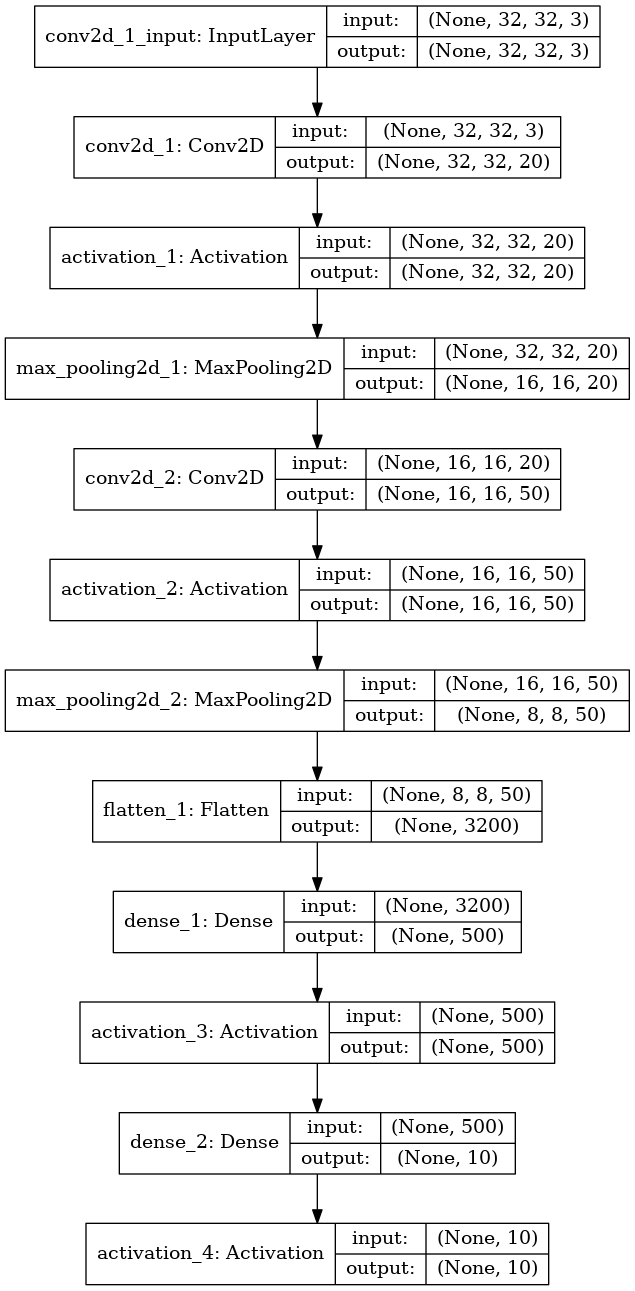

In [6]:
!apt-get install graphviz
!pip install graphviz pydotplus
!pip install --upgrade --force-reinstall pydot
plot_model(model, to_file="lenet.png", show_shapes=True)
Image("lenet.png")

Compilar la red.

In [0]:
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

Entrenamos la red. 

In [13]:
%%time
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=1, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 163s 3ms/step - loss: 14.5023 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
CPU times: user 4min 59s, sys: 3.15 s, total: 5min 2s
Wall time: 2min 42s


Evaluar la red en el conjunto de test, y mostrar el tiempo. 

In [14]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1000
          1       0.00      0.00      0.00      1000
          2       0.00      0.00      0.00      1000
          3       0.00      0.00      0.00      1000
          4       0.00      0.00      0.00      1000
          5       0.00      0.00      0.00      1000
          6       0.00      0.00      0.00      1000
          7       0.00      0.00      0.00      1000
          8       0.00      0.00      0.00      1000
          9       0.10      1.00      0.18      1000

avg / total       0.01      0.10      0.02     10000

CPU times: user 24.4 s, sys: 58 ms, total: 24.5 s
Wall time: 12.7 s


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# GoogleNet
Google generó la red GoogleNet con más capas (22 capas) internas y más sencillas de computar.  

Definimos la red

In [0]:
model = GoogLeNet.build(width=32, height=32, depth=3, classes=10)

Compilamos la red.

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=RMSprop())


Entrenamos la red.

In [18]:
%%time
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=1, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 3902s 78ms/step - loss: 1.2192 - val_loss: 2.4186
CPU times: user 2h 7min 44s, sys: 38.6 s, total: 2h 8min 22s
Wall time: 1h 5min 1s


Evaluar la red en el conjunto de test, y mostramos el tiempo que le ha costado.

In [20]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.41      0.81      0.54      1000
          1       0.43      0.89      0.58      1000
          2       0.40      0.43      0.42      1000
          3       0.44      0.13      0.20      1000
          4       0.44      0.36      0.39      1000
          5       0.52      0.04      0.07      1000
          6       0.90      0.31      0.46      1000
          7       0.32      0.84      0.47      1000
          8       0.73      0.56      0.64      1000
          9       0.67      0.00      0.00      1000

avg / total       0.53      0.44      0.38     10000

CPU times: user 7min 52s, sys: 1.22 s, total: 7min 53s
Wall time: 3min 58s


# VGGNet
Esta red se caracteriza por su simplicidad, utilizando solo capas 3 × 3 convolucionales apiladas una sobre la otra en profundidad creciente.

Definimos la red

In [0]:
model = VGGNet.build(width=32, height=32, depth=3, classes=10)

Compilamos la red.

In [0]:
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy" , optimizer=opt, metrics=["accuracy" ])

Entrenamos la red. 

In [23]:
%%time
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=1, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
19904/50000 [==========>...................] - ETA: 6:29 - loss: 1.9397 - acc: 0.3817

50000/50000 [==============================] - 674s 13ms/step - loss: 1.6400 - acc: 0.4543 - val_loss: 1.1399 - val_acc: 0.5988
CPU times: user 21min 32s, sys: 11.2 s, total: 21min 43s
Wall time: 11min 14s


Evaluar la red en el conjunto de test, y mostramos el tiempo que le ha costado. 

In [24]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.63      0.64      0.64      1000
          1       0.74      0.78      0.76      1000
          2       0.59      0.32      0.41      1000
          3       0.44      0.23      0.31      1000
          4       0.51      0.49      0.50      1000
          5       0.42      0.61      0.50      1000
          6       0.62      0.77      0.69      1000
          7       0.65      0.69      0.67      1000
          8       0.68      0.73      0.70      1000
          9       0.67      0.72      0.69      1000

avg / total       0.60      0.60      0.59     10000

CPU times: user 1min 23s, sys: 273 ms, total: 1min 23s
Wall time: 42.6 s


# ResNet

Definimos la red

In [0]:
model = ResNet.build(width=32, height=32, depth=3, classes=10)

Compilamos la red

In [0]:
opt = SGD(lr=0.005)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [27]:
%%time
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=1, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 8342s 167ms/step - loss: 2.6694 - acc: 0.1842 - val_loss: 2.5771 - val_acc: 0.2363
CPU times: user 4h 29min 51s, sys: 1min 23s, total: 4h 31min 15s
Wall time: 2h 19min 8s


Evaluar la red en el conjunto de test, y mostramos el tiempo que le ha costado. 

In [28]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.31      0.35      0.33      1000
          1       0.19      0.60      0.29      1000
          2       0.16      0.10      0.12      1000
          3       0.13      0.01      0.02      1000
          4       0.24      0.26      0.25      1000
          5       0.18      0.06      0.09      1000
          6       0.26      0.27      0.26      1000
          7       0.20      0.16      0.18      1000
          8       0.34      0.36      0.35      1000
          9       0.27      0.19      0.22      1000

avg / total       0.23      0.24      0.21     10000

CPU times: user 19min 8s, sys: 4.09 s, total: 19min 12s
Wall time: 9min 39s


# ShallowNet

Definimos la red

In [0]:
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)

Compilamos la red.

In [0]:
opt = SGD(lr=0.005)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

Entrenamos la red

In [31]:
%%time
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=1, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 54s 1ms/step - loss: 13.7442 - acc: 0.1461 - val_loss: 13.8970 - val_acc: 0.1373
CPU times: user 1min 29s, sys: 849 ms, total: 1min 30s
Wall time: 54.3 s


Evaluar la red en el conjunto de test, y mostramos el tiempo que le ha costado. 

In [32]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1000
          1       0.10      0.01      0.02      1000
          2       0.00      0.00      0.00      1000
          3       0.16      0.07      0.10      1000
          4       0.00      0.00      0.00      1000
          5       0.18      0.33      0.23      1000
          6       0.00      0.00      0.00      1000
          7       0.00      0.00      0.00      1000
          8       0.00      0.00      0.00      1000
          9       0.13      0.96      0.22      1000

avg / total       0.06      0.14      0.06     10000

CPU times: user 8.53 s, sys: 49 ms, total: 8.58 s
Wall time: 5.38 s


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
